In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataFrames = ['TABLICA_0' + str(i) + '.csv' for i in range(5)]

industrial_index = pd.read_csv(dataFrames[0], sep = ';')

construction_index = pd.read_csv(dataFrames[1], sep = ';')

retail_index = pd.read_csv(dataFrames[2], sep = ';')

shipping_index = pd.read_csv(dataFrames[3], sep = ';')

gastronomy_index = pd.read_csv(dataFrames[4], sep = ';')

In [3]:
col_drop_1 = ['Typ informacji', 'PKD - wybrane sekcje i działy 1 (KG)', 'Flaga']
col_drop_2 = ['Typ informacji', 'PKD - koniunktura gospodarcza (całość)', 'Flaga']

col_rename_1 = {'Wartość': 'INDUSTRIAL'}
industrial_index = industrial_index.rename(columns = col_rename_1).drop(columns = col_drop_1)

col_rename_2 = {'Wartość': 'CONSTRUCTION'}
construction_index = construction_index.rename(columns = col_rename_2).drop(columns = col_drop_1)

col_rename_3 = {'Wartość': 'RENTAL'}
retail_index = retail_index.rename(columns = col_rename_3).drop(columns = col_drop_2)

col_rename_4 = {'Wartość': 'SHIPPING'}
shipping_index = shipping_index.rename(columns = col_rename_4).drop(columns = col_drop_2)

col_rename_5 = {'Wartość': 'GASTRONOMY'}
gastronomy_index = gastronomy_index.rename(columns = col_rename_5).drop(columns = col_drop_2)

In [4]:
merge_1 = pd.merge(left = industrial_index,
                   right = construction_index,
                   left_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'],
                   right_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'])

merge_2 = pd.merge(left = merge_1,
                   right = retail_index,
                   left_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'],
                   right_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'])

merge_3 = pd.merge(left = merge_2,
                   right = shipping_index,
                   left_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'],
                   right_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'])

full_index = pd.merge(left = merge_3,
                      right = gastronomy_index,
                      left_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'],
                      right_on = ['Zmienna', 'Jednostka terytorialna', 'Szereg czasowy'])

In [5]:
full_index['YEAR'] = full_index['Szereg czasowy'].str.split(pat = ' ', expand = True)[0]

full_index['MONTH'] = full_index['Szereg czasowy'].str.split(pat = ' ', expand = True)[1]

for row in full_index['MONTH']:
    if row == 'M01':
        full_index['MONTH'] = full_index['MONTH'].replace(['M01'], ['01'])
    elif row == 'M02':
        full_index['MONTH'] = full_index['MONTH'].replace(['M02'], ['02'])
    elif row == 'M03':
        full_index['MONTH'] = full_index['MONTH'].replace(['M03'], ['03'])
    elif row == 'M04':
        full_index['MONTH'] = full_index['MONTH'].replace(['M04'], ['04'])
    elif row == 'M05':
        full_index['MONTH'] = full_index['MONTH'].replace(['M05'], ['05'])
    elif row == 'M06':
        full_index['MONTH'] = full_index['MONTH'].replace(['M06'], ['06'])
    elif row == 'M07':
        full_index['MONTH'] = full_index['MONTH'].replace(['M07'], ['07'])
    elif row == 'M08':
        full_index['MONTH'] = full_index['MONTH'].replace(['M08'], ['08'])
    elif row == 'M09':
        full_index['MONTH'] = full_index['MONTH'].replace(['M09'], ['09'])
    elif row == 'M10':
        full_index['MONTH'] = full_index['MONTH'].replace(['M10'], ['10'])
    elif row == 'M11':
        full_index['MONTH'] = full_index['MONTH'].replace(['M11'], ['11'])
    else:
        full_index['MONTH'] = full_index['MONTH'].replace(['M12'], ['12'])

full_index['DATE'] = full_index['YEAR'].str.cat(full_index['MONTH'], sep = '-')

In [6]:
col_rename_6 = {'Zmienna': 'PROSPERITY INDEX',
                'Jednostka terytorialna': 'TERRITORY'}

col_drop_3 = ['YEAR', 'MONTH']

col_reindex_1 = ['TERRITORY', 'DATE', 'PROSPERITY INDEX', 'INDUSTRIAL', 'CONSTRUCTION', 'RENTAL', 'SHIPPING', 'GASTRONOMY']

full_index = full_index.rename(columns = col_rename_6).drop(columns = col_drop_3).reindex(columns = col_reindex_1)

for row in full_index['PROSPERITY INDEX']:
    if row == 'Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa':
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa', 'Current Situation')
    elif row == 'Przewidywana ogólna sytuacja gospodarcza przedsiębiorstwa':
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Przewidywana ogólna sytuacja gospodarcza przedsiębiorstwa', 'Anticipated Situation')
    else:
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Wskaźnik ogólnego klimatu koniunktury', 'General Climate')

for row in full_index['TERRITORY']:
    full_index['TERRITORY'] = full_index['TERRITORY'].replace(['POLSKA'], ['Poland'])

full_index = full_index.replace(',', '.', regex = True)

In [7]:
data_types_1 = {'INDUSTRIAL': 'float64',
                'CONSTRUCTION': 'float64',
                'RENTAL': 'float64',
                'SHIPPING': 'float64',
                'GASTRONOMY': 'float64'}

full_index = full_index.astype(data_types_1)

full_index = full_index.sort_values(by = 'DATE')

In [8]:
agg_dict_1 = {'INDUSTRIAL': 'mean',
              'CONSTRUCTION': 'mean',
              'RENTAL': 'mean',
              'SHIPPING': 'mean',
              'GASTRONOMY': 'mean'}

agg_full_index = full_index.groupby(['TERRITORY', 'DATE', 'PROSPERITY INDEX']).agg(agg_dict_1)

agg_full_index.head(9)

INDUSTRIAL  CONSTRUCTION  RENTAL   
TERRITORY DATE    PROSPERITY INDEX                                          
Poland    2015-06 Anticipated Situation         8.9           6.5     1.4  \
                  Current Situation             3.3         -10.4     3.5   
                  General Climate               6.1          -2.0     2.5   
          2015-07 Anticipated Situation         7.7           6.0     0.5   
                  Current Situation             3.9          -8.3     4.5   
                  General Climate               5.8          -1.2     2.5   
          2015-08 Anticipated Situation         9.6           3.8     3.9   
                  Current Situation             4.6          -5.6     4.9   
                  General Climate               7.1          -0.9     4.4   

                                         SHIPPING  GASTRONOMY  
TERRITORY DATE    PROSPERITY INDEX                             
Poland    2015-06 Anticipated Situation      -1.1        13.7  
                  Current Situation           7.9         1.6  
                  General Climate             3.4         7.7  
          2015-07 Anticipated Situation      -0.7        12.9  
                  Current Situation           7.2         5.0  
                  General Climate             3.3         9.0  
          2015-08 Anticipated Situation       4.9         1.9  
                  Current Situation           9.9         9.3  
                  General Climate             7.4         5.6

In [9]:
mask_1 = full_index['PROSPERITY INDEX'] == 'Anticipated Situation'

mask_2 = full_index['PROSPERITY INDEX'] == 'Current Situation'

mask_3 = full_index['PROSPERITY INDEX'] == 'General Climate'

as_index = full_index[mask_1]

cs_index = full_index[mask_2]

gc_index = full_index[mask_3]

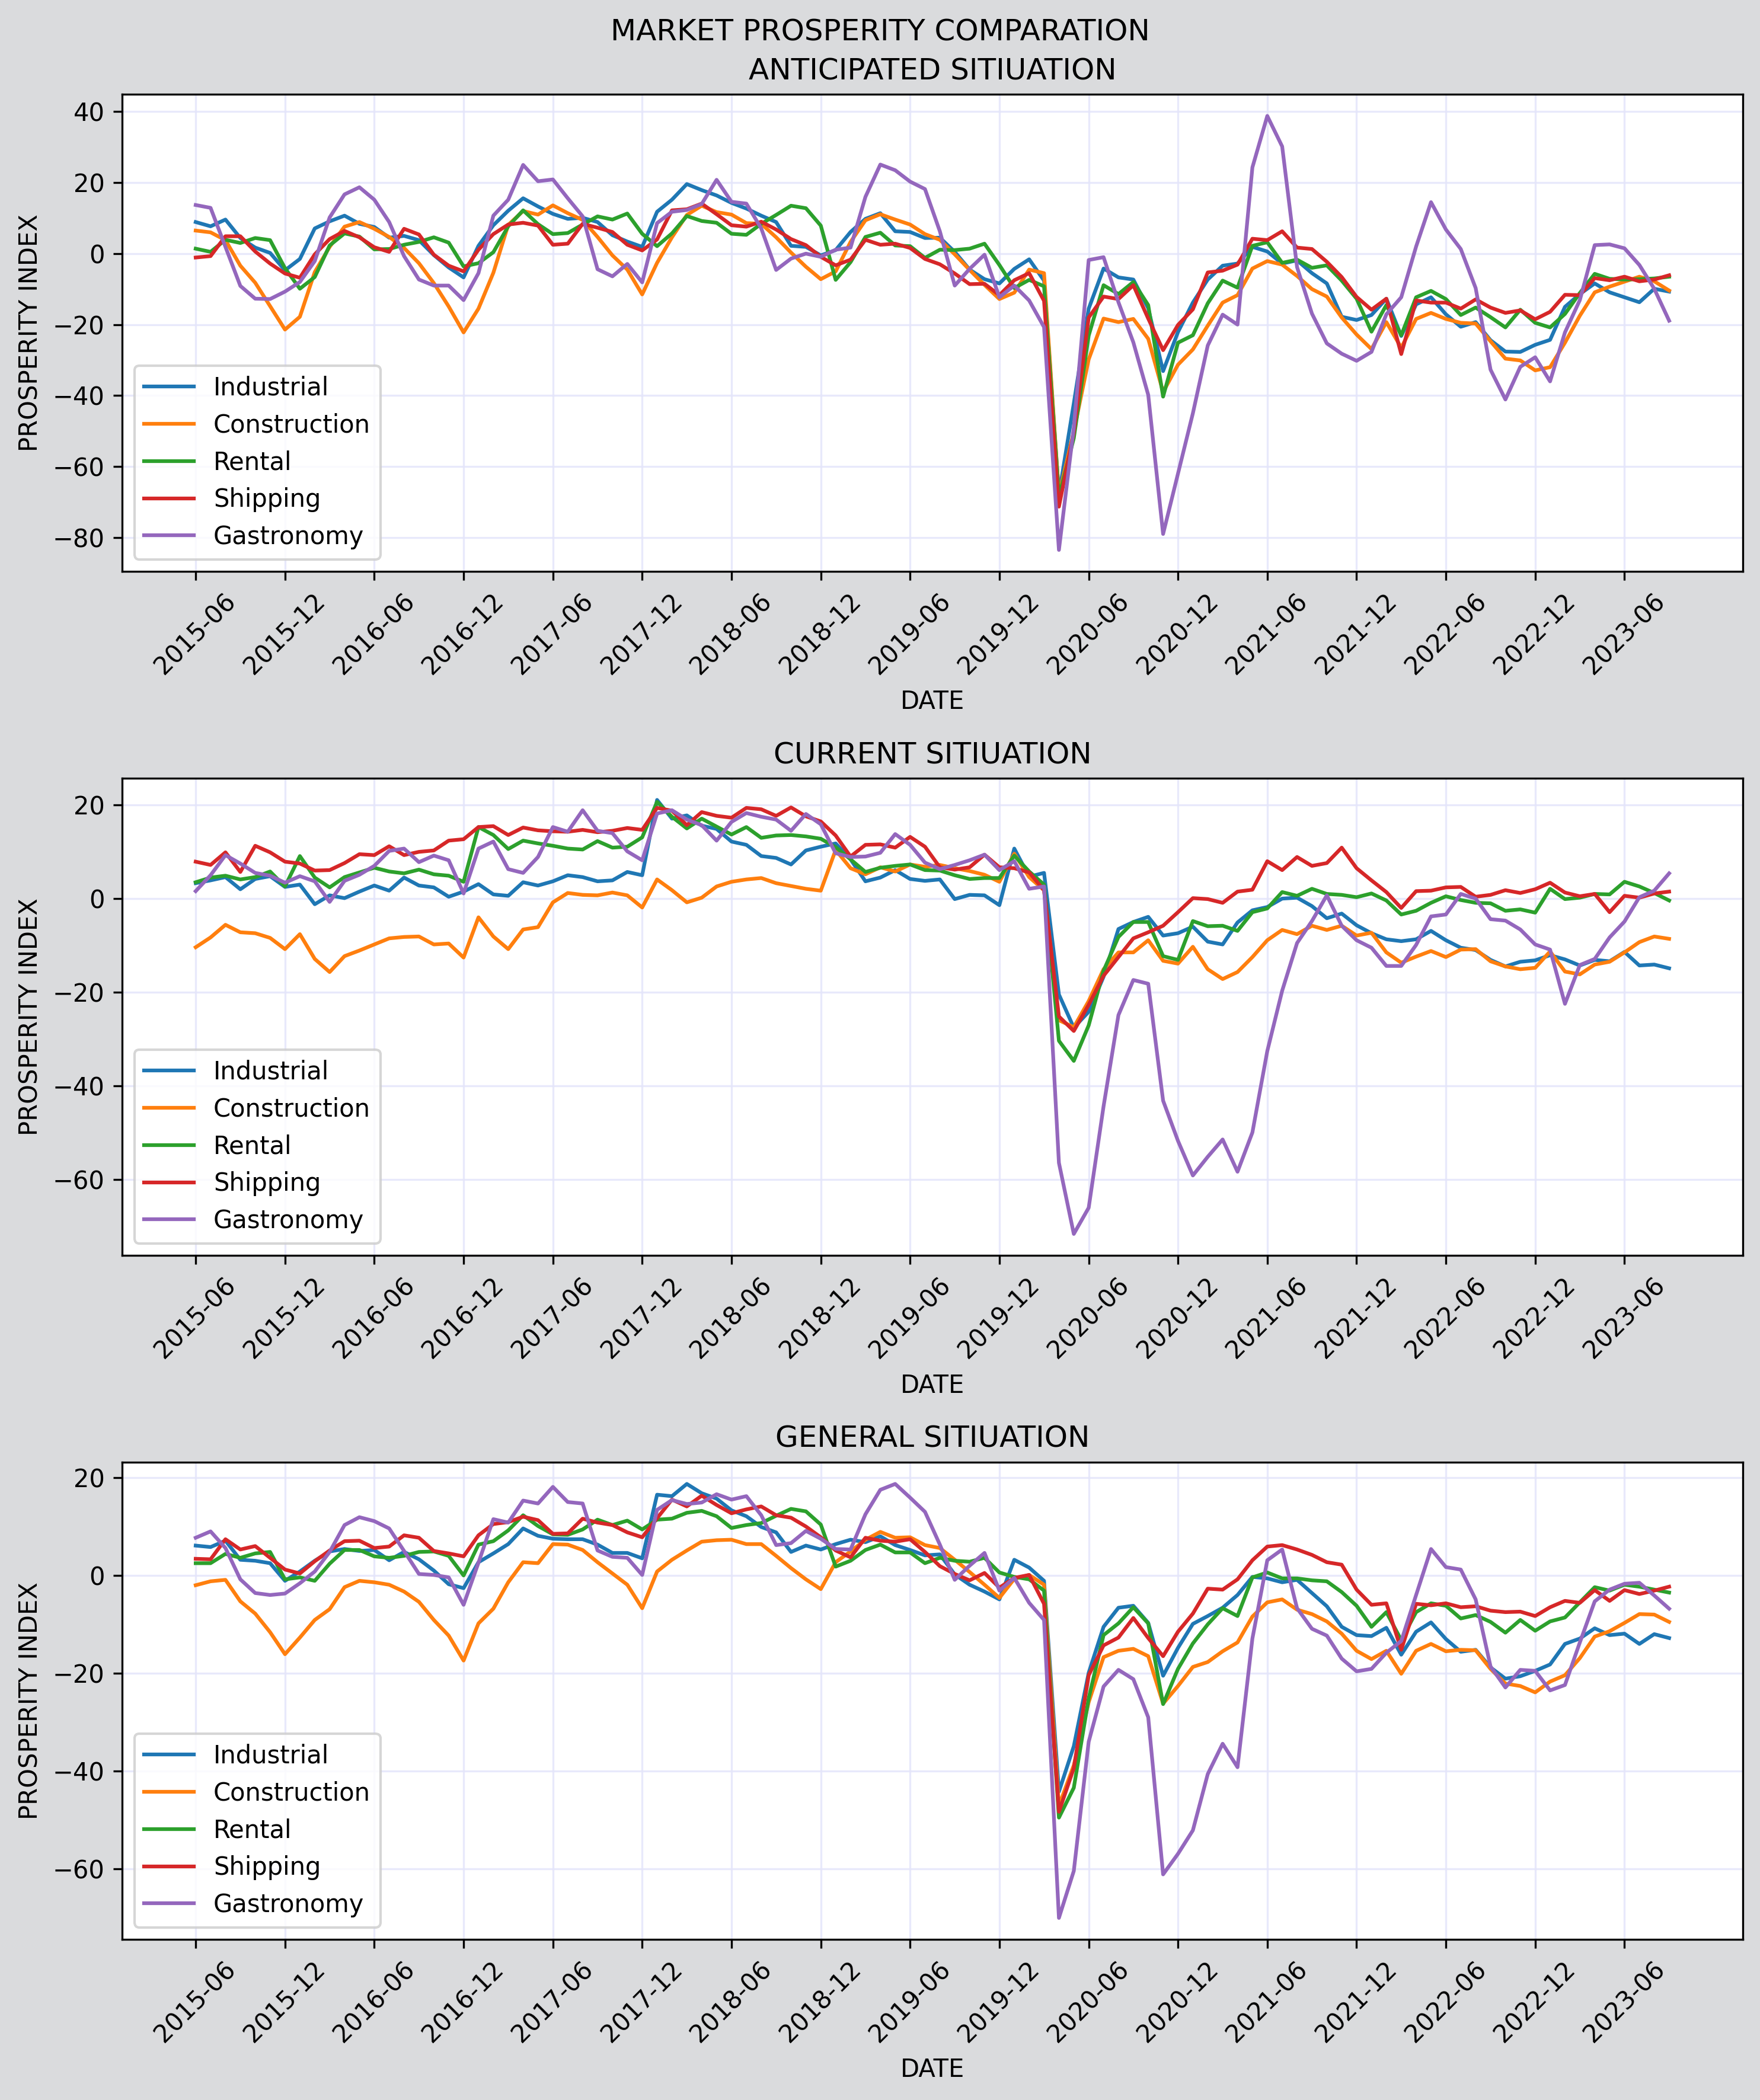

In [10]:
plt.subplots(3, 1, figsize=(10, 12), dpi = 300, facecolor = '#DADBDD')

plt.suptitle('MARKET PROSPERITY COMPARATION')

plt.subplot(3, 1, 1)
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'INDUSTRIAL',
             label = 'Industrial')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'CONSTRUCTION',
             label = 'Construction')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'RENTAL',
             label = 'Rental')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'SHIPPING',
             label = 'Shipping')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'GASTRONOMY',
             label = 'Gastronomy')
plt.xticks(as_index['DATE'][::6],
           rotation = 45)
plt.grid(which = 'both',
         linestyle = 'solid',
         color = '#E3E4FA',
         alpha = 0.8)
plt.legend(loc = 'lower left')
plt.title('ANTICIPATED SITIUATION')
plt.ylabel('PROSPERITY INDEX')

plt.subplot(3, 1, 2)
sns.lineplot(data = cs_index,
             x = 'DATE',
             y = 'INDUSTRIAL',
             label = 'Industrial')
sns.lineplot(data = cs_index,
             x = 'DATE',
             y = 'CONSTRUCTION',
             label = 'Construction')
sns.lineplot(data = cs_index,
             x = 'DATE',
             y = 'RENTAL',
             label = 'Rental')
sns.lineplot(data = cs_index,
             x = 'DATE',
             y = 'SHIPPING',
             label = 'Shipping')
sns.lineplot(data = cs_index,
             x = 'DATE',
             y = 'GASTRONOMY',
             label = 'Gastronomy')
plt.xticks(cs_index['DATE'][::6],
           rotation = 45)
plt.grid(which = 'both',
         linestyle = 'solid',
         color = '#E3E4FA',
         alpha = 0.8)
plt.legend(loc = 'lower left')
plt.title('CURRENT SITIUATION')
plt.ylabel('PROSPERITY INDEX')

plt.subplot(3, 1, 3)
sns.lineplot(data = gc_index,
             x = 'DATE',
             y = 'INDUSTRIAL',
             label = 'Industrial')
sns.lineplot(data = gc_index,
             x = 'DATE',
             y = 'CONSTRUCTION',
             label = 'Construction')
sns.lineplot(data = gc_index,
             x = 'DATE',
             y = 'RENTAL',
             label = 'Rental')
sns.lineplot(data = gc_index,
             x = 'DATE',
             y = 'SHIPPING',
             label = 'Shipping')
sns.lineplot(data = gc_index,
             x = 'DATE',
             y = 'GASTRONOMY',
             label = 'Gastronomy')
plt.xticks(gc_index['DATE'][::6],
           rotation = 45)
plt.grid(which = 'both',
            linestyle = 'solid',
            color = '#E3E4FA',
            alpha = 0.8)
plt.legend(loc = 'lower left')
plt.title('GENERAL SITIUATION')
plt.ylabel('PROSPERITY INDEX')

plt.tight_layout()